In [36]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import interpolate

plt.ion()
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 15, weight='bold')

# Analysis of the measurements made at 45 and 55 K for Vdw vs. J with fixed field H.

Dates of the measurements: 12, 15 and 25 january.

I charge the data...

In [37]:
Vj_45K_H0, VdwL_45K_H0, err_VdwL_45K_H0, VdwR_45K_H0, err_VdwR_45K_H0, VdwJ_45K_H0, err_VdwJ_45K_H0 = np.loadtxt('./GaMnAs_T45K_VdwvsVj_H0.dat', unpack=True)
Vj_45K_Vh100V, VdwJ_45K_Vh100V, err_VdwJ_45K_Vh100V, VdwH_45K_Vh100V, err_VdwH_45K_Vh100V = np.loadtxt('./GaMnAs_T45K_VdwJandVdwHvsVj_Vh100V.dat', unpack=True)
Vj_55K_H0, VdwL_55K_H0, err_VdwL_55K_H0, VdwR_55K_H0, err_VdwR_55K_H0, VdwJ_55K_H0, err_VdwJ_55K_H0 = np.loadtxt('./GaMnAs_T55K_VdwvsVj_H0.dat', unpack=True)
Vj_55K_Vh120V, VdwJ_55K_Vh120V, err_VdwJ_55K_Vh120V, VdwH_55K_Vh120V, err_VdwH_55K_Vh120V = np.loadtxt('./GaMnAs_T55K_VdwJandVdwHvsVj_Vh120V.dat', unpack=True)

In [38]:
VdwH_45K_Vh100V_J0, err_VdwH_45K_Vh100V_J0 = 0.752976098901, 0.0295276791814

In [39]:
J_45K_H0 = Vj_45K_H0/(22140*4e-9*100e-6)*10**-9
J_45K_Vh100V = Vj_45K_Vh100V/(22140*4e-9*100e-6)*10**-9
J_55K_H0 = Vj_55K_H0/(22140*4e-9*100e-6)*10**-9
J_55K_Vh120V = Vj_55K_Vh120V/(22140*4e-9*100e-6)*10**-9

* First, I plot the results with no applied field...

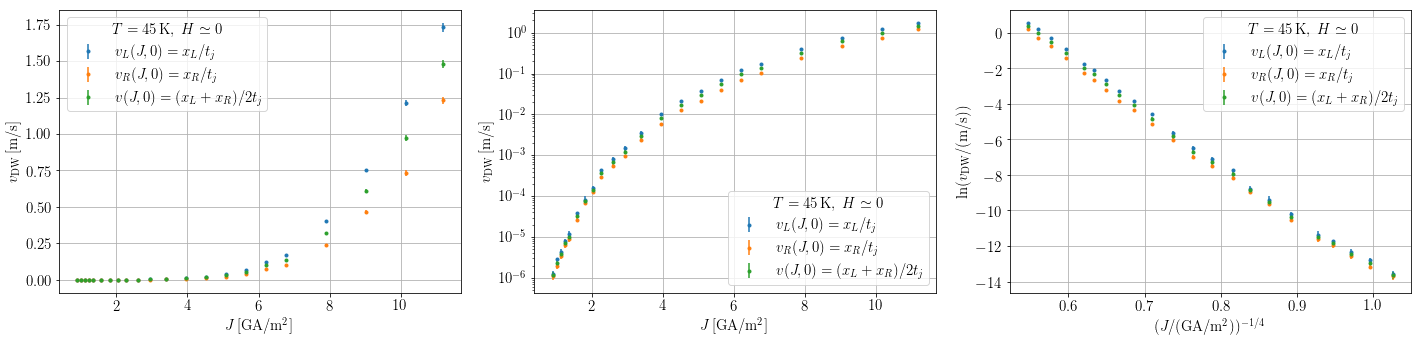

In [54]:
fig, (g1, g2, g3) = plt.subplots(ncols=3, nrows=1, figsize = (20, 5))

g1.errorbar(J_45K_H0, VdwL_45K_H0, yerr=err_VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g1.errorbar(J_45K_H0, VdwR_45K_H0, yerr=err_VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g1.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g1.grid()
g1.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g1.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g1.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')

g2.errorbar(J_45K_H0, VdwL_45K_H0, yerr=err_VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g2.errorbar(J_45K_H0, VdwR_45K_H0, yerr=err_VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g2.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g2.grid()
g2.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g2.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g2.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')
g2.set_yscale('log')

g3.errorbar(J_45K_H0**(-0.25), np.log(VdwL_45K_H0), yerr=err_VdwL_45K_H0/VdwL_45K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g3.errorbar(J_45K_H0**(-0.25), np.log(VdwR_45K_H0), yerr=err_VdwR_45K_H0/VdwR_45K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g3.errorbar(J_45K_H0**(-0.25), np.log(VdwJ_45K_H0), yerr=err_VdwJ_45K_H0/VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g3.grid()
g3.set_xlabel(r'$ (J/(\mathrm{GA/m^{2}}))^{-1/4} $')
g3.set_ylabel(r'$ \ln (v_{\mathrm{DW}}/(\mathrm{m/s})) $')
g3.legend(title=r'$ T=45\,\mathrm{K},\;H \simeq 0 $')

fig.tight_layout()
plt.savefig('GaMnAs_VdwvsJ_T45K_H0.png', dpi = 150)

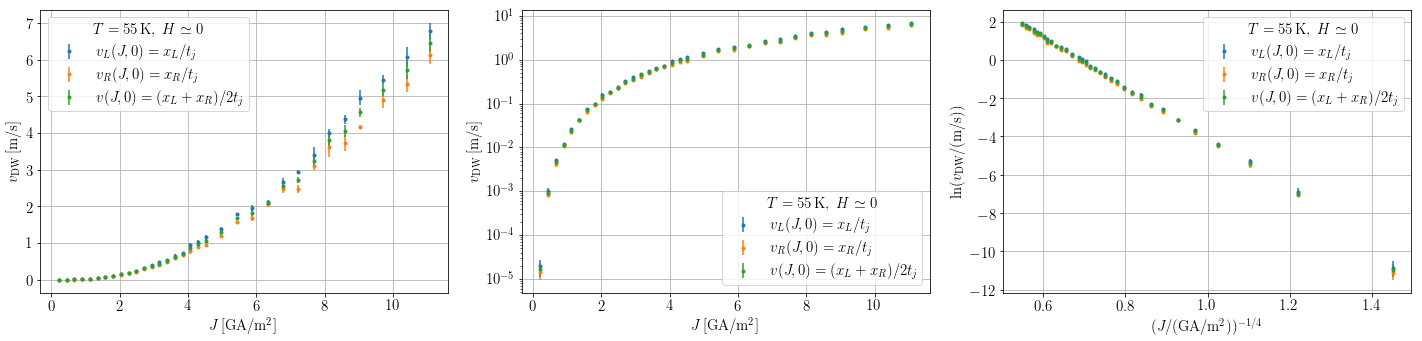

In [41]:
fig, (g1, g2, g3) = plt.subplots(ncols=3, nrows=1, figsize = (20, 5))

g1.errorbar(J_55K_H0, VdwL_55K_H0, yerr=err_VdwL_55K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g1.errorbar(J_55K_H0, VdwR_55K_H0, yerr=err_VdwR_55K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g1.errorbar(J_55K_H0, VdwJ_55K_H0, yerr=err_VdwJ_55K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g1.grid()
g1.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g1.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g1.legend(title=r'$ T=55\,\mathrm{K},\;H \simeq 0 $')

g2.errorbar(J_55K_H0, VdwL_55K_H0, yerr=err_VdwL_55K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g2.errorbar(J_55K_H0, VdwR_55K_H0, yerr=err_VdwR_55K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g2.errorbar(J_55K_H0, VdwJ_55K_H0, yerr=err_VdwJ_55K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g2.grid()
g2.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g2.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g2.legend(title=r'$ T=55\,\mathrm{K},\;H \simeq 0 $')
g2.set_yscale('log')

g3.errorbar(J_55K_H0**(-0.25), np.log(VdwL_55K_H0), yerr=err_VdwL_55K_H0/VdwL_55K_H0, fmt='.', label=r'$ v_L(J,0) = x_L/t_j $')
g3.errorbar(J_55K_H0**(-0.25), np.log(VdwR_55K_H0), yerr=err_VdwR_55K_H0/VdwR_55K_H0, fmt='.', label=r'$ v_R(J,0) = x_R/t_j $')
g3.errorbar(J_55K_H0**(-0.25), np.log(VdwJ_55K_H0), yerr=err_VdwJ_55K_H0/VdwJ_55K_H0, fmt='.', label=r'$ v(J,0) = (x_L+x_R)/2t_j $')
g3.grid()
g3.set_xlabel(r'$ (J/(\mathrm{GA/m^{2}}))^{-1/4} $')
g3.set_ylabel(r'$ \ln (v_{\mathrm{DW}}/(\mathrm{m/s})) $')
g3.legend(title=r'$ T=55\,\mathrm{K},\;H \simeq 0 $')

fig.tight_layout()
plt.savefig('GaMnAs_VdwvsJ_T55K_H0.png', dpi = 150)

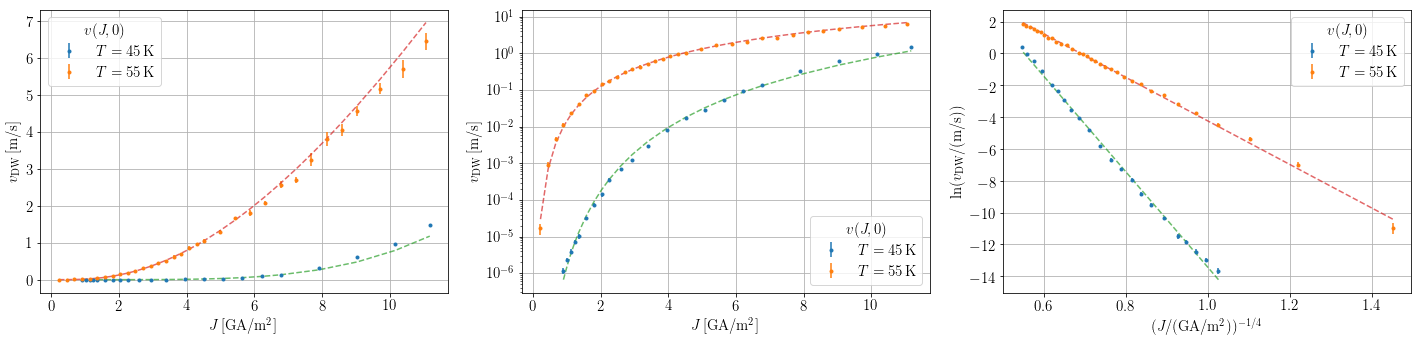

In [42]:
fig, (g1, g2, g3) = plt.subplots(ncols=3, nrows=1, figsize = (20, 5))

ajusteCreep_T45K = np.polyfit(J_45K_H0**(-0.25), np.log(VdwJ_45K_H0), 1)
ajusteCreep_T55K = np.polyfit(J_55K_H0**(-0.25), np.log(VdwJ_55K_H0), 1)

g1.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ T=45\,\mathrm{K} $')
g1.errorbar(J_55K_H0, VdwJ_55K_H0, yerr=err_VdwJ_55K_H0, fmt='.', label=r'$ T=55\,\mathrm{K} $')
g1.plot(J_45K_H0, np.exp(np.polyval(ajusteCreep_T45K, J_45K_H0**(-0.25))), '--', alpha=0.7)
g1.plot(J_55K_H0, np.exp(np.polyval(ajusteCreep_T55K, J_55K_H0**(-0.25))), '--', alpha=0.7)
g1.grid()
g1.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g1.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g1.legend(title=r'$ v(J,0) $')

g2.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ T=45\,\mathrm{K} $')
g2.errorbar(J_55K_H0, VdwJ_55K_H0, yerr=err_VdwJ_55K_H0, fmt='.', label=r'$ T=55\,\mathrm{K} $')
g2.plot(J_45K_H0, np.exp(np.polyval(ajusteCreep_T45K, J_45K_H0**(-0.25))), '--', alpha=0.7)
g2.plot(J_55K_H0, np.exp(np.polyval(ajusteCreep_T55K, J_55K_H0**(-0.25))), '--', alpha=0.7)
g2.grid()
g2.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g2.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g2.legend(title=r'$ v(J,0) $')
g2.set_yscale('log')

g3.errorbar(J_45K_H0**(-0.25), np.log(VdwJ_45K_H0), yerr=err_VdwJ_45K_H0/VdwJ_45K_H0, fmt='.', label=r'$ T=45\,\mathrm{K} $')
g3.errorbar(J_55K_H0**(-0.25), np.log(VdwJ_55K_H0), yerr=err_VdwJ_55K_H0/VdwJ_55K_H0, fmt='.', label=r'$ T=55\,\mathrm{K} $')
g3.plot(J_45K_H0**(-0.25), np.polyval(ajusteCreep_T45K, J_45K_H0**(-0.25)), '--', alpha=0.7)
g3.plot(J_55K_H0**(-0.25), np.polyval(ajusteCreep_T55K, J_55K_H0**(-0.25)), '--', alpha=0.7)
g3.grid()
g3.set_xlabel(r'$ (J/(\mathrm{GA/m^{2}}))^{-1/4} $')
g3.set_ylabel(r'$ \ln (v_{\mathrm{DW}}/(\mathrm{m/s})) $')
g3.legend(title=r'$ v(J,0) $')

fig.tight_layout()
plt.savefig('GaMnAs_VdwJvsJ_T45Kand55K_H0.png', dpi = 150)

* Now we analyze the results obtained for Vdw vs. J with a fixed applied field. These results are obtained from the measured DW displacements (for the left and right DWs) following this reasoning:

If $ t_j > t_h $ (lower currents), the DW displacement for the left and right walls will be
$$
x_L = v_L(J,H) t_h + v(J,0) (t_j-t_h)\\
x_R = v_R(J,H) t_h + v(J,0) (t_j-t_h)
$$
The velocities $ v_L(J,H) $ and $ v_R(J,H) $ can hopefully be divided in two contributions:
$$
v_L(J,H) = v_j(J,H) + v_h(J,H)\\
v_R(J,H) = v_j(J,H) - v_h(J,H)
$$
where $ v_j(J,H) $ and $ v_h(J,H) $ are the current- and field-induced domain wall velocities.

Using these equations, we obtain
$$
v_j(J,H) = \dfrac{x_L+x_R}{2t_h} - v(J,0) \dfrac{t_j-t_h}{t_h}\\
v_h(J,H) = \dfrac{x_L-x_R}{2t_h}
$$


If $ t_j < t_h $ (higher currents), we obtain following an analogous reasoning that
$$
v_j(J,H) = \dfrac{x_L+x_R}{2t_j}\\
v_h(J,H) = \dfrac{x_L-x_R}{2t_j} - v(0,H) \dfrac{t_h-t_j}{t_j}
$$

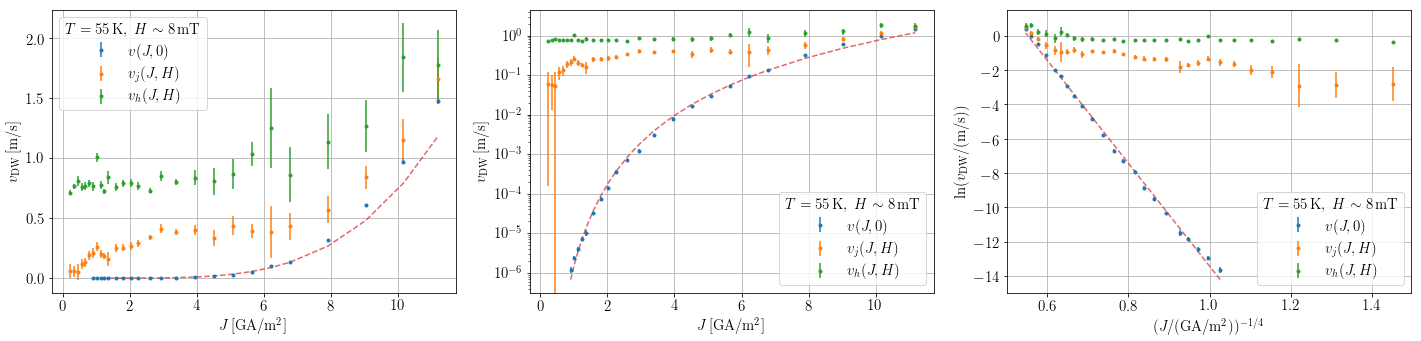

In [52]:
fig, (g1, g2, g3) = plt.subplots(ncols=3, nrows=1, figsize = (20, 5))

g1.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) $')
g1.errorbar(J_45K_Vh100V, VdwJ_45K_Vh100V, yerr=err_VdwJ_45K_Vh100V, fmt='.', label=r'$ v_j(J,H) $')
g1.errorbar(J_45K_Vh100V, VdwH_45K_Vh100V, yerr=err_VdwH_45K_Vh100V, fmt='.', label=r'$ v_h(J,H) $')
g1.plot(J_45K_H0, np.exp(np.polyval(ajusteCreep_T45K, J_45K_H0**(-0.25))), '--', alpha=0.7)
g1.grid()
g1.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g1.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g1.legend(title=r'$ T=55\,\mathrm{K},\; H \sim 8\,\mathrm{mT} $')

g2.errorbar(J_45K_H0, VdwJ_45K_H0, yerr=err_VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) $')
g2.errorbar(J_45K_Vh100V, VdwJ_45K_Vh100V, yerr=err_VdwJ_45K_Vh100V, fmt='.', label=r'$ v_j(J,H) $')
g2.errorbar(J_45K_Vh100V, VdwH_45K_Vh100V, yerr=err_VdwH_45K_Vh100V, fmt='.', label=r'$ v_h(J,H) $')
g2.plot(J_45K_H0, np.exp(np.polyval(ajusteCreep_T45K, J_45K_H0**(-0.25))), '--', alpha=0.7)
g2.grid()
g2.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g2.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g2.legend(title=r'$ T=55\,\mathrm{K},\; H \sim 8\,\mathrm{mT} $')
g2.set_yscale('log')

g3.errorbar(J_45K_H0**(-0.25), np.log(VdwJ_45K_H0), yerr=err_VdwJ_45K_H0/VdwJ_45K_H0, fmt='.', label=r'$ v(J,0) $')
g3.errorbar(J_45K_Vh100V**(-0.25), np.log(VdwJ_45K_Vh100V), yerr=err_VdwJ_45K_Vh100V/VdwJ_45K_Vh100V, fmt='.', label=r'$ v_j(J,H) $')
g3.errorbar(J_45K_Vh100V**(-0.25), np.log(VdwH_45K_Vh100V), yerr=err_VdwH_45K_Vh100V/VdwH_45K_Vh100V, fmt='.', label=r'$ v_h(J,H) $')
g3.plot(J_45K_H0**(-0.25), np.polyval(ajusteCreep_T45K, J_45K_H0**(-0.25)), '--', alpha=0.7)
g3.grid()
g3.set_xlabel(r'$ (J/(\mathrm{GA/m^{2}}))^{-1/4} $')
g3.set_ylabel(r'$ \ln (v_{\mathrm{DW}}/(\mathrm{m/s})) $')
g3.legend(title=r'$ T=55\,\mathrm{K},\; H \sim 8\,\mathrm{mT} $')

fig.tight_layout()
plt.savefig('GaMnAs_VdwvsJ_T45K_H8mT.png', dpi = 150)

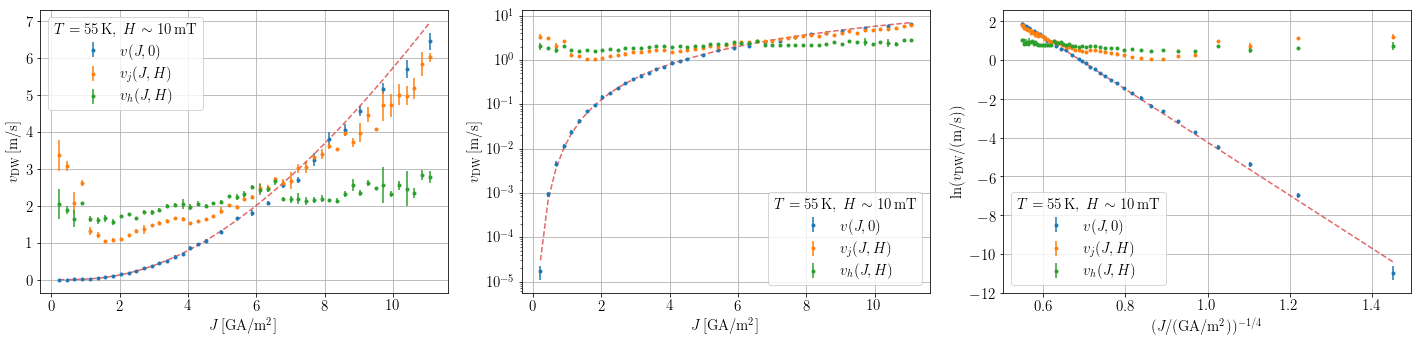

In [53]:
fig, (g1, g2, g3) = plt.subplots(ncols=3, nrows=1, figsize = (20, 5))

g1.errorbar(J_55K_H0, VdwJ_55K_H0, yerr=err_VdwJ_55K_H0, fmt='.', label=r'$ v(J,0) $')
g1.errorbar(J_55K_Vh120V, VdwJ_55K_Vh120V, yerr=err_VdwJ_55K_Vh120V, fmt='.', label=r'$ v_j(J,H) $')
g1.errorbar(J_55K_Vh120V, VdwH_55K_Vh120V, yerr=err_VdwH_55K_Vh120V, fmt='.', label=r'$ v_h(J,H) $')
g1.plot(J_55K_H0, np.exp(np.polyval(ajusteCreep_T55K, J_55K_H0**(-0.25))), '--', alpha=0.7)
g1.grid()
g1.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g1.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g1.legend(title=r'$ T=55\,\mathrm{K},\; H \sim 10\,\mathrm{mT} $')

g2.errorbar(J_55K_H0, VdwJ_55K_H0, yerr=err_VdwJ_55K_H0, fmt='.', label=r'$ v(J,0) $')
g2.errorbar(J_55K_Vh120V, VdwJ_55K_Vh120V, yerr=err_VdwJ_55K_Vh120V, fmt='.', label=r'$ v_j(J,H) $')
g2.errorbar(J_55K_Vh120V, VdwH_55K_Vh120V, yerr=err_VdwH_55K_Vh120V, fmt='.', label=r'$ v_h(J,H) $')
g2.plot(J_55K_H0, np.exp(np.polyval(ajusteCreep_T55K, J_55K_H0**(-0.25))), '--', alpha=0.7)
g2.grid()
g2.set_xlabel(r'$ J\,[\mathrm{GA/m^{2}}] $')
g2.set_ylabel(r'$ v_{\mathrm{DW}}\,[\mathrm{m/s}] $')
g2.legend(title=r'$ T=55\,\mathrm{K},\; H \sim 10\,\mathrm{mT} $')
g2.set_yscale('log')

g3.errorbar(J_55K_H0**(-0.25), np.log(VdwJ_55K_H0), yerr=err_VdwJ_55K_H0/VdwJ_55K_H0, fmt='.', label=r'$ v(J,0) $')
g3.errorbar(J_55K_Vh120V**(-0.25), np.log(VdwJ_55K_Vh120V), yerr=err_VdwJ_55K_Vh120V/VdwJ_55K_Vh120V, fmt='.', label=r'$ v_j(J,H) $')
g3.errorbar(J_55K_Vh120V**(-0.25), np.log(VdwH_55K_Vh120V), yerr=err_VdwH_55K_Vh120V/VdwH_55K_Vh120V, fmt='.', label=r'$ v_h(J,H) $')
g3.plot(J_55K_H0**(-0.25), np.polyval(ajusteCreep_T55K, J_55K_H0**(-0.25)), '--', alpha=0.7)
g3.grid()
g3.set_xlabel(r'$ (J/(\mathrm{GA/m^{2}}))^{-1/4} $')
g3.set_ylabel(r'$ \ln (v_{\mathrm{DW}}/(\mathrm{m/s})) $')
g3.legend(title=r'$ T=55\,\mathrm{K},\; H \sim 10\,\mathrm{mT} $')

fig.tight_layout()
#plt.savefig('', dpi = 150)